# A simple introductional notebook to HEP analysis in python
In this notebook you can find an easy set of commands that show the basic computing techniques commonly used in high energy physics (HEP) analyses. It also shows how to create a histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. At the end you get a plot with the number of tracks.

Simple pyROOT notebook example

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)

The library used is ROOT - a scientific software framework that provides all the functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

First of all ROOT is imported to read the files in the _.root_ data format. A _.root_ file consists of a tree having branches and leaves. At this point you could also import further programs that contain other formulas that you maybe use more often. But here we don't import other programs to keep it simple.

In [1]:
import ROOT

Welcome to JupyROOT 6.24/06


Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
#f = ROOT.TFile.Open("Tracks_Clusters.root") 
f = ROOT.TFile.Open("https://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TracksClusters/Tracks_Clusters.root") 

After the data is opened we create a canvas on which we can draw a histogram. If we do not have a canvas we cannot see our histogram at the end. Its name is _Canvas_ and its header is _a first way to plot a variable_. The two following arguments define the width and the height of the canvas.

In [3]:
canvas = ROOT.TCanvas("Canvas","a first way to plot a variable",800,600)

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree"

In [4]:
tree = f.Get("JetRecoTree")

Print the number of entries. This is the number of events saved.

In [5]:
tree.Print()
tree.GetEntries()

102900

******************************************************************************
*Tree    :JetRecoTree: JetRecoTree                                            *
*Entries :   102900 : Total =      3334789039 bytes  File  Size = 2227126936 *
*        :          : Tree compression factor =   1.50                       *
******************************************************************************
*Br    0 :EventNumber : EventNumber/l                                        *
*Entries :   102900 : Total  Size=     836872 bytes  File Size  =     448624 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=   1.86     *
*............................................................................*
*Br    1 :RunNumber : RunNumber/l                                            *
*Entries :   102900 : Total  Size=     836610 bytes  File Size  =      20416 *
*Baskets :      127 : Basket Size=       7219 bytes  Compression=  40.84     *
*..................................................

Now we define a histogram that will later be placed on this canvas. Its name is NPV and the header of the histogram is Example plot: Number of primary vertices. The three following arguments indicate that this histogram contains 50 so called bins which have a range from 1 to 50.

In [7]:
hist_npv = ROOT.TH1F("NPV","Example plot: Number of primary vertices; NPV ; Events ",50,1,50)
#hist_npv_mu = ROOT.TH2F("NPV","Example plot: Number of primary vertices; NPV ; Events ",50,1,50,)

Warning in <TDavixFile::Append>: Replacing existing TH1: NPV (Potential memory leak).


The following lines are a loop that goes over the data (events) that is stored in the tree and fills the histogram with the event variable NPV. In this first notebook we don't do any cuts to keep it simple. Accordingly the loop fills the histogram for each event stored in the tree. After the program has looped over all the data it prints the word __Done!__.

In [ ]:
for event in tree:
    hist_npv.Fill(tree.NPV)
    
print("Done!")

In [8]:
hist_npv.SetFillColor(2)
hist_npv.Draw()

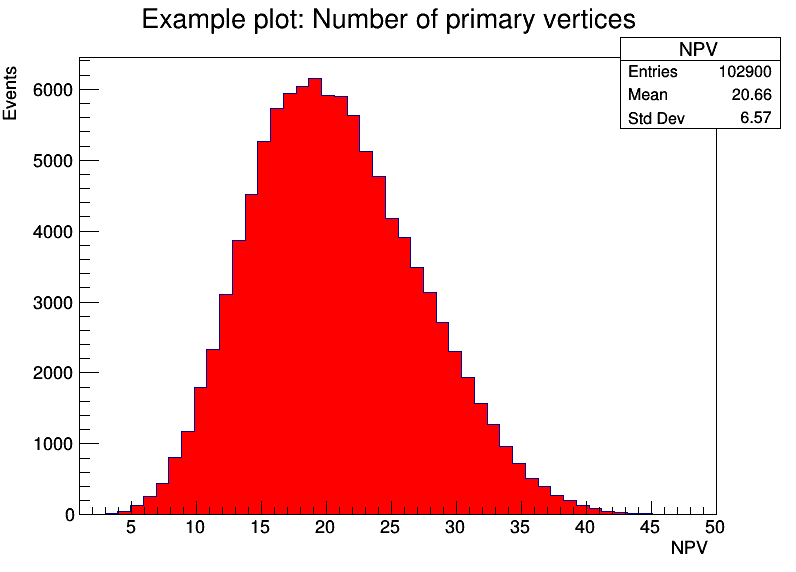

In [9]:
canvas.Draw()

Now we normalise the histogram to the number of entries

In [10]:
scale = hist_npv.Integral()
hist_npv.Scale(1/scale)
hist_npv.SetFillColor(2)

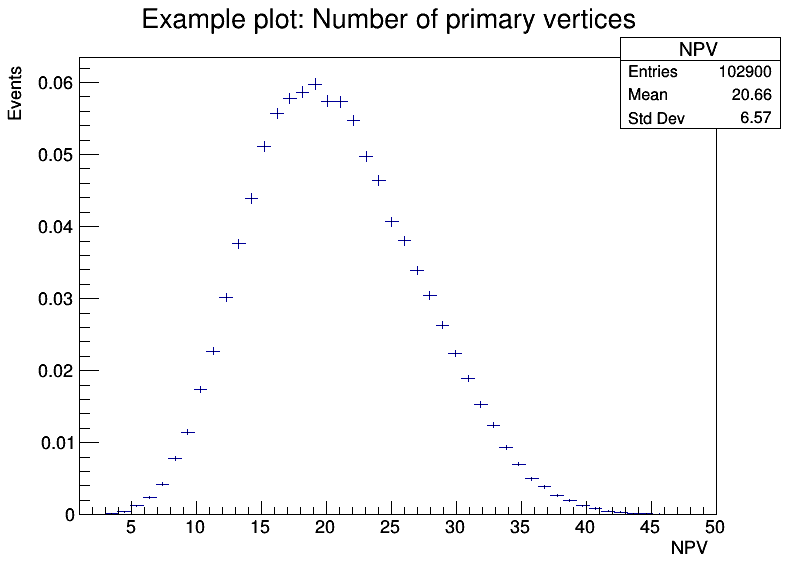

In [11]:
hist_npv.Draw()
canvas.Draw("hist_npv")

<b>Excercises: 
    1. Plot the number of average interactions per bunch-crossing (mu_average)
    2. Make a 2D histogram of NPV vs. mu
</b>

Some branches are not event variables, but objects with some kinematical infomation. They are stored in vectors. For example tracks and clusters. We will create two histograms to store the number of tracks and clusters in each event. 

In [12]:
hist_nTrks = ROOT.TH1F("NTracks","Example plot: Number of tracks; NTracks ; Events ",50,0,1000)
hist_nCltrs = ROOT.TH1F("NClusters","Example plot: Number of clusters; NClusters ; Events ",50,0,1000)

For each event, fill the histograms with the size of the vectors

In [13]:
for event in tree:
    hist_nTrks.Fill(tree.Tracks_pt.size())
    hist_nCltrs.Fill(tree.Clusters_pt.size())
    
print("Done!")

Done!


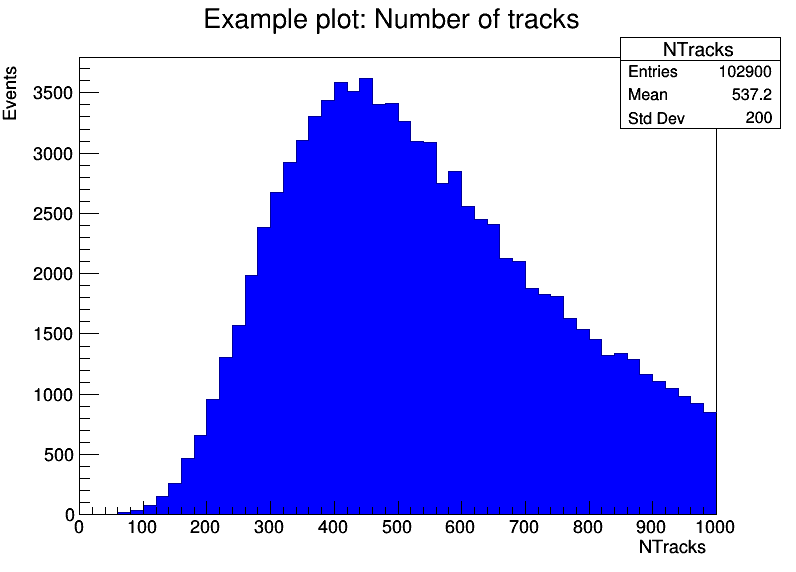

In [14]:
hist_nTrks.SetFillColor(4)
hist_nTrks.Draw()
canvas.Draw()

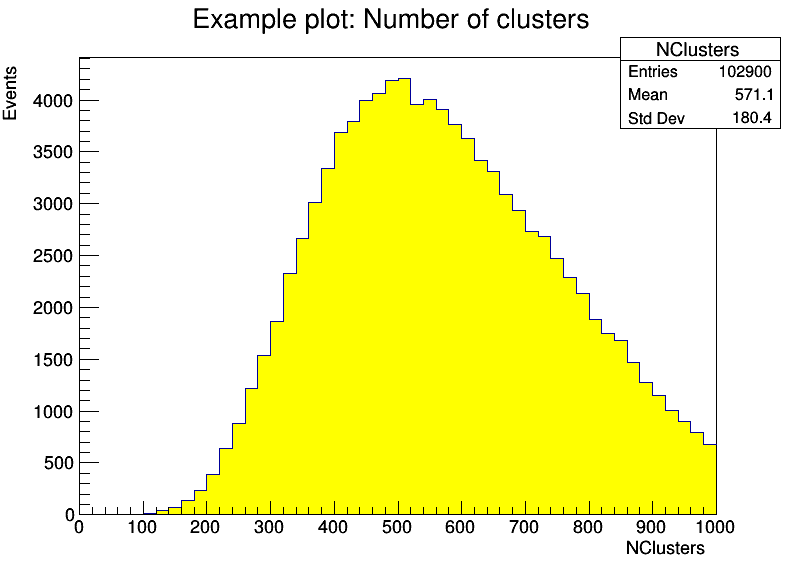

In [15]:
hist_nCltrs.SetFillColor(5)
hist_nCltrs.Draw()
canvas.Draw()

<b>Excercise: 
    3. Make a 2D histogram of NPV and mu vs. nTracks and nClusters: NPV vs. nTrack, NPV vs. nClusters, mu vs. nTrack, mu vs. NClusters
</b>

Now let us plot the pT of the "lead" track:

In [16]:
hist_track_pT = ROOT.TH1F("Track_pT","Example plot: Track pT; pT (MeV) ; Events ",50,100,1000)

In [17]:
for event in tree:
    for tr in range(tree.Tracks_pt.size()):
        hist_track_pT.Fill(tree.Tracks_pt.at(tr))
    
print("Done!")

Done!


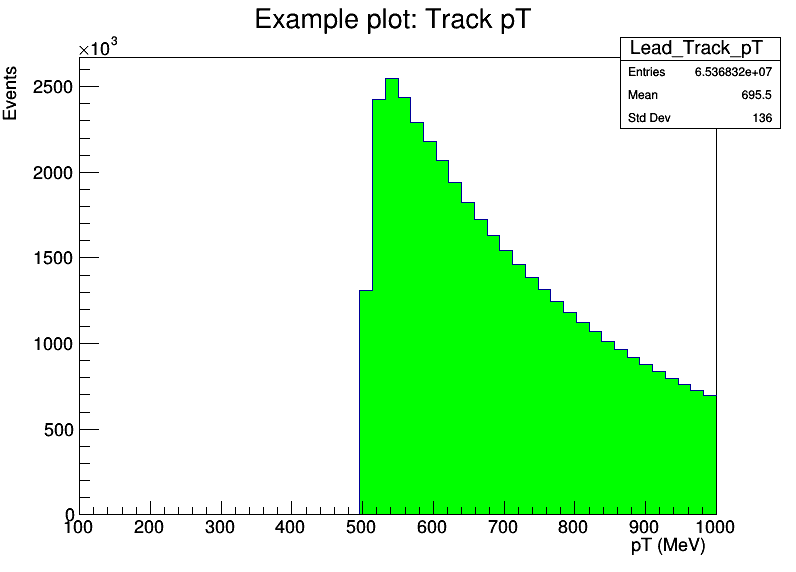

In [18]:
hist_lead_track_pT.SetFillColor(3)
hist_lead_track_pT.Draw()
canvas.Draw()

<b>Excercises: 
4. Plot all track, cluster and particle variables
5. Interpret the meaning of each variable
6. What is "Particle PDG ID"?
</b>